In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import statistics
import random
import math

# PRESENT Sbox
S = [12,5,6,11,9,0,10,13,3,14,15,8,4,7,1,2]

In [4]:
#Loading data from the random dataset
file_no_rk = 10000
traces_rk = []
plaintexts_rk = []
keys_rk = []

for i in range(file_no_rk):
    with open('../random_dataset/trace_'+str(i)+'.txt') as f:
        lines = f.read().splitlines()
        traces_rk.append(lines)

with open('../random_dataset/plaintexts.txt') as f:
    plaintexts_rk = f.read().splitlines()

with open('../random_dataset/keys.txt') as f:
    keys_rk = f.read().splitlines()

trace_array_rk = np.array(traces_rk)
trace_array_rk = trace_array_rk.astype(float)

#number of time samples in one trace
N_rk = 5000

In [5]:
sbox_outputs = [[0 for i in range(16)] for j in range(file_no_rk)]
#compute the intermediate values
for j in range(file_no_rk):
    for i in range(16):
        pt = int(plaintexts_rk[j][15-i],16)#extract the target nibble of the plaintext
        ky = int(keys_rk[j][15-i],16)#extract the target nibble of the first round key
        v = S[ky^pt]#compute the output of the 0th Sbox for this plaintext
        sbox_outputs[j][i] = v

In [6]:
#Function for computing SNR, given time sample t
def findPOI(nibble):
    no_of_sets = 16
    SNR_all = [0 for i in range(N_rk)]
    
    #for each time sample
    for t in range(N_rk):
        #no_of_sets sets
        A = [[] for y in range(no_of_sets)] 

        #for each trace/plaintext
        for j in range(file_no_rk):
        #get the output of the target Sbox for this plaintext
            v = sbox_outputs[j][nibble]
            A[v].append(trace_array_rk[j][t])#group the leakage at time t according to this output

        #compute the averages for leakages in each set
        avg = []
        for v in range(no_of_sets):
            avg.append(statistics.mean(A[v]))

        #variance of signal is given by the variance of leakage avgs
        varX = np.var(avg)

        #take leakage minus mean
        LminusAvg = []
        for v in range(no_of_sets):
            for j in range(len(A[v])):
                LminusAvg.append(A[v][j]-avg[v])
        #variance of noise is given by variance of leakage minus mean
        varN = np.var(LminusAvg)

        #SNR is given by variance of signal divided by variance of noise
        snr = varX/varN
        SNR_all[t]=snr
    
    #print figure
    plt.plot(SNR_all)
    plt.show()
    
    #find the highest point
    poi = index_max = np.argmax(SNR_all)
    print("POI = " + str(poi) + ", with SNR = " + str(SNR_all[poi]))
    return poi

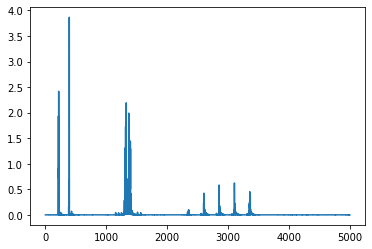

POI = 392with SNR = 3.866126175969948


392

In [7]:
findPOI(0)

In [ ]:
findPOI(3)

In [ ]:
findPOI(5)